<a href="https://colab.research.google.com/github/uhyozzy/multi_finalproject/blob/master/EDA/numberics_categorical_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly
!pip install jupyter-dash #plotly로 만든 그래프를 쥬피터 노트북에 출력하는 패키지

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# **Numberics Data**

## **파일준비**
- demograpics
- services

In [15]:
# demograpics 파일읽기, 불러오기
demo_df = pd.read_excel('/content/Telco_customer_churn_demographics.xlsx')
demo_df

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,Churn Value,Churn Score,CLTV
0,0,78,0,1,0,0,0,3,1,91,5433
1,1,74,0,1,1,1,1,3,1,69,5302
2,0,71,0,1,0,1,3,2,1,81,3179
3,1,78,0,1,1,1,1,2,1,88,5337
4,1,80,0,1,1,1,1,2,1,67,2793
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,30,0,0,0,0,0,5,0,45,5306
7039,0,38,0,0,1,1,2,3,0,59,2140
7040,1,30,0,0,1,1,2,4,0,71,5560
7041,1,32,0,0,1,1,2,4,0,59,2793


In [16]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Gender                7043 non-null   int64
 1   Age                   7043 non-null   int64
 2   Under 30              7043 non-null   int64
 3   Senior Citizen        7043 non-null   int64
 4   Married               7043 non-null   int64
 5   Dependents            7043 non-null   int64
 6   Number of Dependents  7043 non-null   int64
 7   Satisfaction Score    7043 non-null   int64
 8   Churn Value           7043 non-null   int64
 9   Churn Score           7043 non-null   int64
 10  CLTV                  7043 non-null   int64
dtypes: int64(11)
memory usage: 605.4 KB


In [24]:
# services 파일읽기, 불러오기
serv_df = pd.read_excel('/content/Telco_customer_churn_services.xlsx')
serv_df

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
0,0,0,1,0,0.00,0,1,8,0,0,...,39.65,39.65,0.00,20,0.00,59.65,3,1,91,5433
1,1,1,8,1,48.85,1,1,17,0,1,...,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,5302
2,0,0,18,1,11.33,1,1,52,0,0,...,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,3179
3,1,1,25,1,19.76,0,1,12,0,1,...,98.50,2514.50,13.43,0,494.00,2995.07,2,1,88,5337
4,1,1,37,1,6.33,1,1,14,0,0,...,76.50,2868.15,0.00,0,234.21,3102.36,2,1,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,22.77,0,0,0,0,0,...,21.15,1419.40,19.31,0,1639.44,3039.53,5,0,45,5306
7039,1,1,24,1,36.05,1,1,24,1,0,...,84.80,1990.50,48.23,0,865.20,2807.47,3,0,59,2140
7040,1,4,72,1,29.66,1,1,59,0,1,...,103.20,7362.90,45.38,0,2135.52,9453.04,4,0,71,5560
7041,1,1,11,0,0.00,0,1,17,1,0,...,29.60,346.45,27.24,0,0.00,319.21,4,0,59,2793


In [23]:
serv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int64  
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   int64  
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   int64  
 6   Internet Service                   7043 non-null   int64  
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   int64  
 9   Online Backup                      7043 non-null   int64  
 10  Device Protection Plan             7043 non-null   int64  
 11  Premium Tech Support               7043 non-null   int64

## **상관관계 분석**

**demograpics와 status**

In [20]:
demo_corr=demo_df.corr()
demo_corr

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,Churn Value,Churn Score,CLTV
Gender,1.000000,-0.002186,0.002962,0.001874,0.001808,-0.005229,-0.005840,0.003948,0.008612,-0.000638,0.006851
Age,-0.002186,1.000000,-0.672651,0.681507,-0.003666,-0.125450,-0.119000,-0.085170,0.115760,0.083919,-0.001826
Under 30,0.002962,-0.672651,1.000000,-0.219216,0.015140,0.041651,0.036340,0.041993,-0.054604,-0.043948,-0.008363
Senior Citizen,0.001874,0.681507,-0.219216,1.000000,0.016479,-0.174396,-0.168152,-0.116601,0.150889,0.101947,-0.003167
Married,0.001808,-0.003666,0.015140,0.016479,1.000000,0.363430,0.324205,0.077743,-0.150448,-0.111704,0.137859
Dependents,-0.005229,-0.125450,0.041651,-0.174396,0.363430,1.000000,0.888234,0.168359,-0.248542,-0.173695,0.058222
Number of Dependents,-0.005840,-0.119000,0.036340,-0.168152,0.324205,0.888234,1.000000,0.152873,-0.218780,-0.160743,0.049611
Satisfaction Score,0.003948,-0.085170,0.041993,-0.116601,0.077743,0.168359,0.152873,1.000000,-0.754649,-0.495144,0.075811
Churn Value,0.008612,0.115760,-0.054604,0.150889,-0.150448,-0.248542,-0.218780,-0.754649,1.000000,0.660772,-0.127463
Churn Score,-0.000638,0.083919,-0.043948,0.101947,-0.111704,-0.173695,-0.160743,-0.495144,0.660772,1.000000,-0.079232


**services와 status**

In [25]:
serv_corr=serv_df.corr()
serv_corr

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
Referred a Friend,1.000000,0.708291,0.361844,0.015418,0.008702,0.132641,0.002842,0.055003,0.139510,0.143177,...,0.094101,0.304199,0.038250,0.020150,0.250769,0.314777,0.077764,-0.149122,-0.106648,0.125249
Number of Referrals,0.708291,1.000000,0.326975,0.009947,0.006336,0.078080,-0.038984,0.038575,0.142416,0.112369,...,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,0.188926,-0.286540,-0.202209,0.122843
Tenure in Months,0.361844,0.326975,1.000000,0.008271,0.014596,0.332101,0.038582,0.049119,0.327543,0.360558,...,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,0.210557,-0.352861,-0.224982,0.396292
Phone Service,0.015418,0.009947,0.008271,1.000000,0.486673,0.279690,-0.172209,-0.102748,-0.092893,-0.052312,...,0.247398,0.113106,0.006331,-0.030620,0.289728,0.174788,0.013601,0.011942,0.024664,0.023015
Avg Monthly Long Distance Charges,0.008702,0.006336,0.014596,0.486673,1.000000,0.136004,-0.068605,-0.030455,-0.028108,-0.013909,...,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.001146,0.008120,0.021857,0.023858
Multiple Lines,0.132641,0.078080,0.332101,0.279690,0.136004,1.000000,0.210564,0.091679,0.098108,0.202237,...,0.490434,0.468615,0.045491,0.064443,0.323165,0.466583,-0.054236,0.040102,0.043143,0.133568
Internet Service,0.002842,-0.038984,0.038582,-0.172209,-0.068605,0.210564,1.000000,0.528450,0.333403,0.381593,...,0.763557,0.375269,0.020515,0.143736,-0.013128,0.294141,-0.264526,0.227890,0.144000,0.011521
Avg Monthly GB Download,0.055003,0.038575,0.049119,-0.102748,-0.030455,0.091679,0.528450,1.000000,0.234738,0.229254,...,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,-0.091657,0.048868,0.022421,0.023043
Online Security,0.139510,0.142416,0.327543,-0.092893,-0.028108,0.098108,0.333403,0.234738,1.000000,0.283832,...,0.296594,0.411922,0.008190,0.058889,0.200477,0.385542,-0.093158,-0.171226,-0.117410,0.138354
Online Backup,0.143177,0.112369,0.360558,-0.052312,-0.013909,0.202237,0.381593,0.229254,0.283832,1.000000,...,0.441780,0.509507,0.016855,0.095852,0.239873,0.474667,0.003252,-0.082255,-0.048030,0.138610


**status별 시각화**
- 어떤 데이터를 label로 사용해야할까?
- 결론
  - Satisfaction Score Churn Value가 강한 반비례 관계(-0.754649)
  - Churn Score와와 Churn Value가 강한 비례 관계(0.660772)

In [180]:
# demograpics 파일읽기, 불러오기
Telco_customer_churn_status_df = pd.read_excel('/content/Telco_customer_churn_status.xlsx')
Telco_customer_churn_status_df

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,HNJTLH8249,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,SJJDWW6147,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,AODCBE7865,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,GLQPEW3973,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


In [182]:
status_df = Telco_customer_churn_status_df[["Satisfaction Score","Churn Value","Churn Score","CLTV"]]
status_df

,Satisfaction Score,Churn Value,Churn Score,CLTV
0,3,1,91,5433
1,3,1,69,5302
2,2,1,81,3179
3,2,1,88,5337
4,2,1,67,2793
...,...,...,...,...
7038,5,0,45,5306
7039,3,0,59,2140
7040,4,0,71,5560
7041,4,0,59,2793


In [183]:
stat_corr=status_df.corr()
stat_corr

,Satisfaction Score,Churn Value,Churn Score,CLTV
Satisfaction Score,1.000000,-0.754649,-0.495144,0.075811
Churn Value,-0.754649,1.000000,0.660772,-0.127463
Churn Score,-0.495144,0.660772,1.000000,-0.079232
CLTV,0.075811,-0.127463,-0.079232,1.000000


In [186]:
reason_df = Telco_customer_churn_status_df[["Churn Category","Churn Reason"]]
reason_df

,Churn Category,Churn Reason
0,Competitor,Competitor offered more data
1,Competitor,Competitor made better offer
2,Competitor,Competitor made better offer
3,Dissatisfaction,Limited range of services
4,Price,Extra data charges
...,...,...
7038,NaN,NaN
7039,NaN,NaN
7040,NaN,NaN
7041,NaN,NaN


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(reason_df, *['Churn Category'], **{})
chart

## **상관관계 시각화**

<Figure size 2000x2000 with 0 Axes>

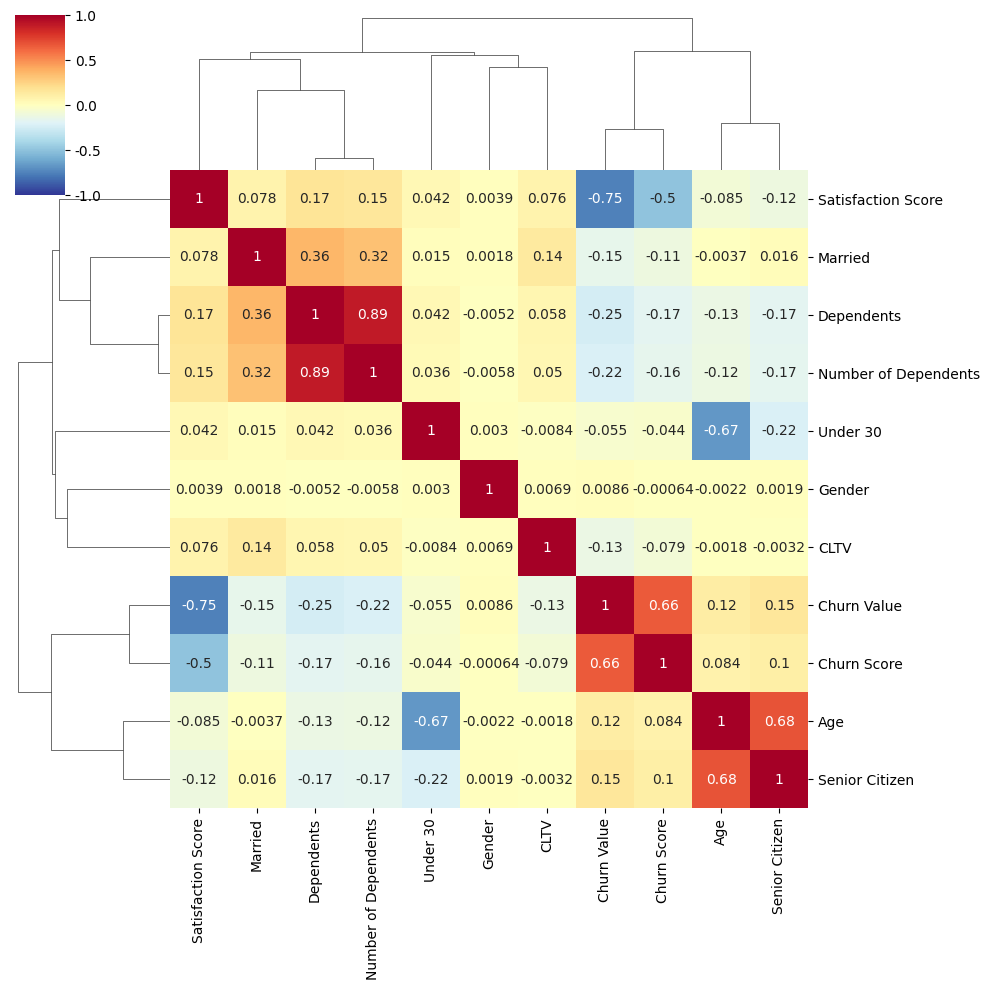

In [60]:
# 히트맵 생성
plt.figure(figsize=(20, 20))
sns.clustermap(demo_corr,
               annot=True,
               cmap='RdYlBu_r',
               vmin=-1, vmax=1)
plt.show()

<Figure size 2000x2000 with 0 Axes>

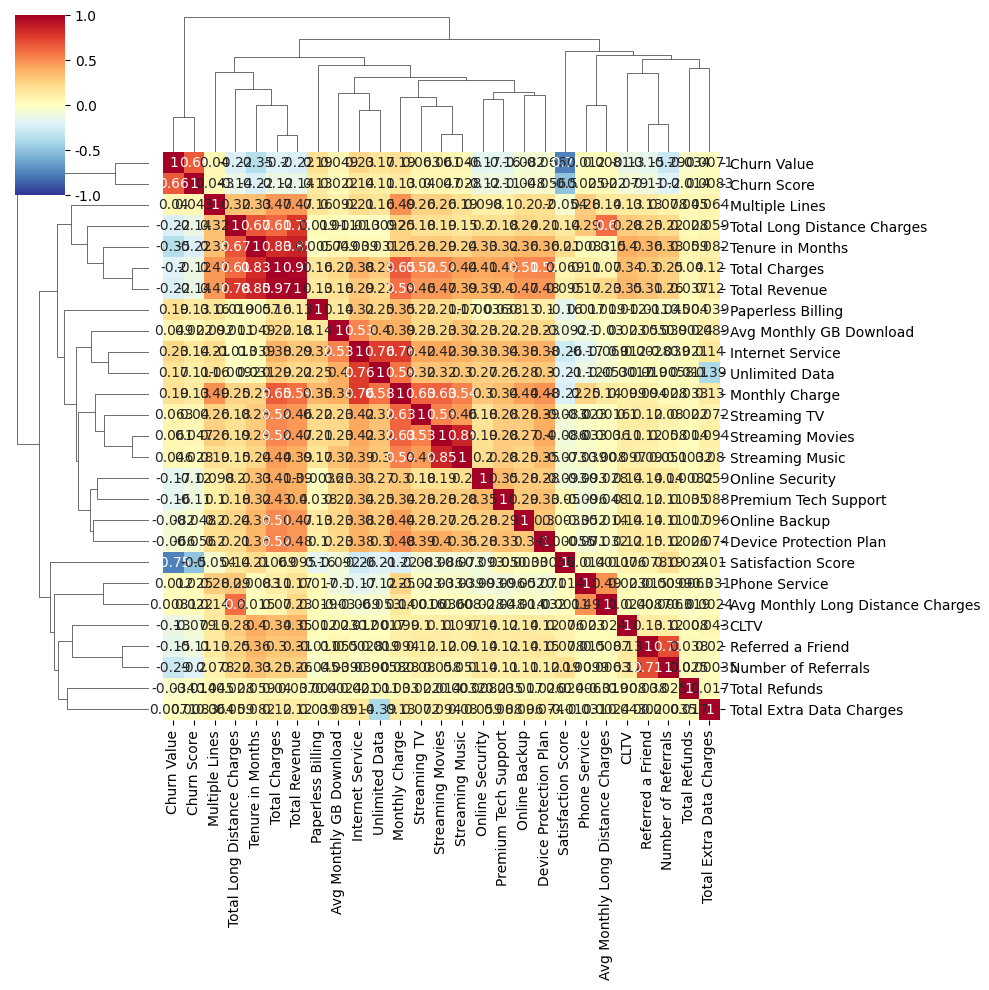

In [28]:
# 히트맵 생성
plt.figure(figsize=(20, 20))
sns.clustermap(serv_corr,
               annot=True,
               cmap='RdYlBu_r',
               vmin=-1, vmax=1)
plt.show()

# **Categorical Data**

In [63]:
# demograpics 파일읽기, 불러오기
cate_demo_df = pd.read_excel('/content/categorical_demographics.xlsx')
cate_demo_df

,Gender,Age,Age Group,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,70,No,Yes,No,No,0,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,Female,74,70,No,Yes,Yes,Yes,1,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,Male,71,70,No,Yes,No,Yes,3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,Female,78,70,No,Yes,Yes,Yes,1,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,Female,80,80,No,Yes,Yes,Yes,1,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,30,30,No,No,No,No,0,5,Stayed,No,0,45,5306,NaN,NaN
7039,Male,38,30,No,No,Yes,Yes,2,3,Stayed,No,0,59,2140,NaN,NaN
7040,Female,30,30,No,No,Yes,Yes,2,4,Stayed,No,0,71,5560,NaN,NaN
7041,Female,32,30,No,No,Yes,Yes,2,4,Stayed,No,0,59,2793,NaN,NaN


## **성별 이탈율**
- 성별 + 이탈여부
- 결과 : 성별에 따른 만족도 상관관계 낮음

In [152]:
gender = cate_demo_df[cate_demo_df['Churn Value'] == 1] # 'Churn Value'가 1인 데이터만 필터링

count_data = gender.groupby(['Gender']).size().reset_index(name='Churn Value_Count') # 'Gender'별로 'Churn Value'의 갯수를 계산

fig = px.bar(count_data, x='Gender', y='Churn Value_Count', color='Gender',
             width=600, height=400) # 그래프 생성
fig.update_traces(showlegend=False) # 범례 생략

fig.show() # 그래프 표시

## **나이별 이탈율**
- 나이 + 이탈여부
- 결과 : 나이별에 따른 이탈율 비례 관계(특히 70, 80대에 높음)

In [151]:
age = cate_demo_df[cate_demo_df['Churn Value'] == 1] # 'Churn Value'가 1인 데이터만 필터링

count_data = age.groupby(['Age Group']).size().reset_index(name='Churn Value_Count') # 'Age Group'별로 'Churn Value'의 갯수를 계산

fig = px.bar(count_data, x='Age Group', y='Churn Value_Count', color='Age Group',
             width=600, height=400) # 그래프 생성
fig.update_traces(showlegend=False) # 범례 생략

fig.show() # 그래프 표시

## **고객상태별 이탈율**
- 고객상태 + 이탈점수 (이탈점수로 하면 stayed와 joined의 차이가 없어서 이탈점수로 함)
- 결과 : stayed와 joined의 특별한 차이는 없는 것으로 보임

In [177]:
# 그래프 생성
fig = px.bar(cate_demo_df, x='Customer Status', y='Churn Score', color='Customer Status',
             title='Customer Status에 따른 평균 Churn Score',
             width=600, height=400,
             opacity=1)

fig.update_traces(showlegend=False) # 범례 생략

# 그래프 표시
fig.show()


## **결혼여부에 따른 이탈율**
- 결혼여부 + 이탈여부
- 결과 : 미혼이 이탈확률이 더 큼

In [150]:
married = cate_demo_df[cate_demo_df['Churn Value'] == 1]

count_data = married.groupby(['Married']).size().reset_index(name='Churn Value_Count')

fig = px.bar(count_data, x='Married', y='Churn Value_Count', color='Married',
             width=600, height=400)
fig.update_traces(showlegend=False)

fig.show()

## **부양가족수와 이탈점수**
- 부양가족수 + 이탈여부
- 결과 :
  - 부양가족 수가 없을 경우 강한 이탈 확률을 가짐

In [149]:
dependents = cate_demo_df[cate_demo_df['Churn Value'] == 1]

count_data = dependents.groupby(['Number of Dependents']).size().reset_index(name='Churn Value_Count')

fig = px.bar(count_data, x='Number of Dependents', y='Churn Value_Count', color='Number of Dependents',
             width=600, height=400)
fig.update_traces(showlegend=False)

fig.show() # 그래프 표시

# **Categorical Data - (2)Servies**

In [72]:
# services 파일읽기, 불러오기
serv_demo_df = pd.read_excel('/content/categorical_services.xlsx')
serv_demo_df

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,No,0,1,None,No,0.00,No,Yes,DSL,8,...,20,0.00,59.65,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,...,0,390.80,1024.10,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,...,0,203.94,1910.88,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,...,0,494.00,2995.07,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,...,0,234.21,3102.36,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,72,None,Yes,22.77,No,No,None,0,...,0,1639.44,3039.53,Stayed,No,0,45,5306,NaN,NaN
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,...,0,865.20,2807.47,Stayed,No,0,59,2140,NaN,NaN
7040,Yes,4,72,None,Yes,29.66,Yes,Yes,Fiber Optic,59,...,0,2135.52,9453.04,Stayed,No,0,71,5560,NaN,NaN
7041,Yes,1,11,None,No,0.00,No,Yes,DSL,17,...,0,0.00,319.21,Stayed,No,0,59,2793,NaN,NaN


## **마케팅 제안에 따른 이탈율**
- 마케팅 제안 종류 + 이탈여부
- 결과 : 어떤 마케팅인지 알수 없지만, 추후 이 데이터를 활용할 때 활용하면 좋을듯

In [148]:
offer = serv_demo_df[cate_demo_df['Churn Value'] == 1]

count_data = offer.groupby(['Offer']).size().reset_index(name='Churn Value_Count')

fig = px.bar(count_data, x='Offer', y='Churn Value_Count', color='Offer',
             width=600, height=400)
fig.update_traces(showlegend=False)

fig.show() # 그래프 표시

## **인터넷 서비스(Internet Type)에 따른 이탈율**
- 인터넷 이용 타입 + 이탈여부
- 결과 : Fiber Optic사용자가 가장 이탈을 많이하고, cable 사용자가 가장 이탈을 적게함

In [147]:
internet_type = serv_demo_df[cate_demo_df['Churn Value'] == 1]

count_data = internet_type.groupby(['Internet Type']).size().reset_index(name='Churn Value_Count')

fig = px.bar(count_data, x='Internet Type', y='Churn Value_Count', color='Internet Type',
             width=600, height=400)
fig.update_traces(showlegend=False)

fig.show() # 그래프 표시

## **계약방식 (Contract)에 따른 이탈율**
- Contract + 이탈율
- 결과: 짧은 계약기간을 선택할수록 이탈확률이 높음

In [145]:
contract = serv_demo_df[cate_demo_df['Churn Value'] == 1]

count_data = contract.groupby(['Contract']).size().reset_index(name='Churn Value_Count')

fig = px.bar(count_data, x='Contract', y='Churn Value_Count', color='Contract',
             width=600, height=400)
fig.update_traces(showlegend=False)

fig.show() # 그래프 표시

## **결제방식 (Payment Method)에 따른 이탈율**
- Payment Method + 이탈율
- 결과: 은행인출-> 신용카드-> 우표결제순으로 이탈 확률이 높음

In [146]:
payment = serv_demo_df[cate_demo_df['Churn Value'] == 1]

count_data = payment.groupby(['Payment Method']).size().reset_index(name='Churn Value_Count')

fig = px.bar(count_data, x='Payment Method', y='Churn Value_Count', color='Payment Method',
             width=600, height=400)
fig.update_traces(showlegend=False)

fig.show() # 그래프 표시